# Data Description

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [75]:
#importing dataset from github

df=pd.read_excel(r'customer_retention_data.xlsx')
df.head()

,Gender,Age,City,Pincode,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,11 What browser do you run on your device to access the website?,12 Which channel did you follow to arrive for the first time?,"13 After first visit, how do you reach the online retail store?",14 How much time do you explore the e- retail?,15 What is your preferred payment Option?,16 How 4 do you abandon your shopping cart?,"17 Why did you abandon the “Bag”, “Shopping Cart”?",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted,20 Complete information on listed seller and product being offered.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,Google chrome,Search Engine,Search Engine,6-10 mins,"E-wallets (Paytm, Freecharge etc.)",Sometimes,Lack of trust,Agree (4),Indifferent (3),Indifferent (3),Agree (4),Agree (4),Strongly disagree (1),Dis-agree (2),Dis-agree (2),Disagree (2),Strongly agree (5),Agree (4),Agree (4),indifferent (3),Strongly disagree (1),Dis-agree (2)

Totally, We have a 296 rows and 71 columns in the dataset.

In [59]:
df.columns

Index(['Gender', 'Age', 'City', '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?',
       '10 What is the operating system (OS) of your device?',
       '11 What browser do you run on your device to access the website?',
       '12 Which channel did you follow to arrive for the first time?',
       '13 After first visit, how do you reach the online retail store?',
       '14 How much time do you explore the e- retail?',
       '15 What is your preferred payment Option?',
       '16 How 4 do you abandon your shopping cart?',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?',
       '18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted'

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

The above code will help me to view all the columns and rows whenever is required.

# Checking Data type and Shape

In [48]:
df.dtypes

Gender                                                                                  object
Age                                                                                     object
City                                                                                    object
Pincode                                                                                  int64
5 Since How Long You are Shopping Online ?                                              object
6 How many times you have made an online purchase in the past 1 year?                   object
7 How do you access the internet while shopping on-line?                                object
8 Which device do you use to access the online shopping?                                object
9 What is the screen size of your mobile device?                                        object
10 What is the operating system (OS) of your device?                                    object
11 What browser do you run on your device to acces

In [31]:
df.shape

(269, 71)

In [49]:
df.isnull().sum()

Gender                                                                                  0
Age                                                                                     0
City                                                                                    0
Pincode                                                                                 0
5 Since How Long You are Shopping Online ?                                              0
6 How many times you have made an online purchase in the past 1 year?                   0
7 How do you access the internet while shopping on-line?                                0
8 Which device do you use to access the online shopping?                                0
9 What is the screen size of your mobile device?                                        0
10 What is the operating system (OS) of your device?                                    0
11 What browser do you run on your device to access the website?                        0
12 Which c

From the above info - we can clearly see there is no null value in all columns this decision come from the above info.

# Checking Unique Columns

In [50]:
df["City"].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64

Here, Delhi and outer Delhi(Noida & Greater Noida) is occupied more in the dataset.

In [51]:
df["Age"].value_counts()

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64

In [52]:
df["Gender"].value_counts()

Female    181
Male       88
Name: Gender, dtype: int64

In the dataset, We can see Female is 180 occupied more when compare to Male is 89.

In [78]:
df["13 After first visit, how do you reach the online retail store?"].value_counts()

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: 13 After first visit, how do you reach the online retail store?, dtype: int64

In [83]:
df["18 The content on the website must be easy to read and understand"].value_counts()

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: 18 The content on the website must be easy to read and understand, dtype: int64

In [84]:
df["21 All relevant information on listed products must be stated clearly"].value_counts()

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64

In [85]:
df["22 Ease of navigation in website"].value_counts()

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64

In [86]:
df["16 How 4 do you abandon your shopping cart?"].value_counts()

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: 16 How 4 do you abandon your shopping cart?, dtype: int64

In [87]:
df["17 Why did you abandon the “Bag”, “Shopping Cart”?"].value_counts()

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?, dtype: int64

In [88]:
df["15 What is your preferred payment Option?"].value_counts()

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?, dtype: int64

In [89]:
df["14 How much time do you explore the e- retail?"].value_counts()

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail?, dtype: int64

In [90]:
df["10 What is the operating system (OS) of your device?"].value_counts()

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?, dtype: int64

In [91]:
df["5 Since How Long You are Shopping Online ?"].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

In [21]:
df["Which of the Indian online retailer would you recommend to a friend?"].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

Output of the dataset - Most of the person will refer the Amazon only which mean one third people.

In [76]:
df=df.drop(['Pincode'],axis=1)

We have successfully removed the column 4 from the dataset because here no use to contain the pincode details for upcoming step.

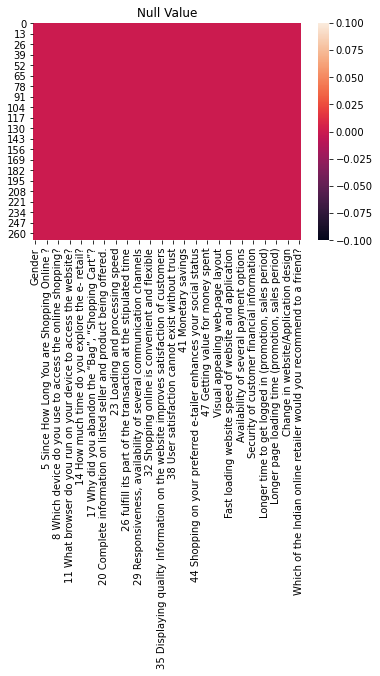

In [54]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

# Visualization of Data:

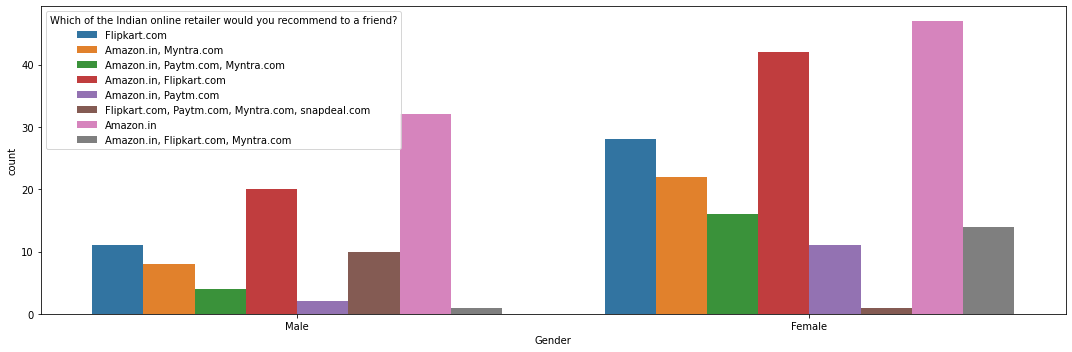

In [55]:
fig = plt.figure(figsize=(15,5))
sns.countplot('Gender', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

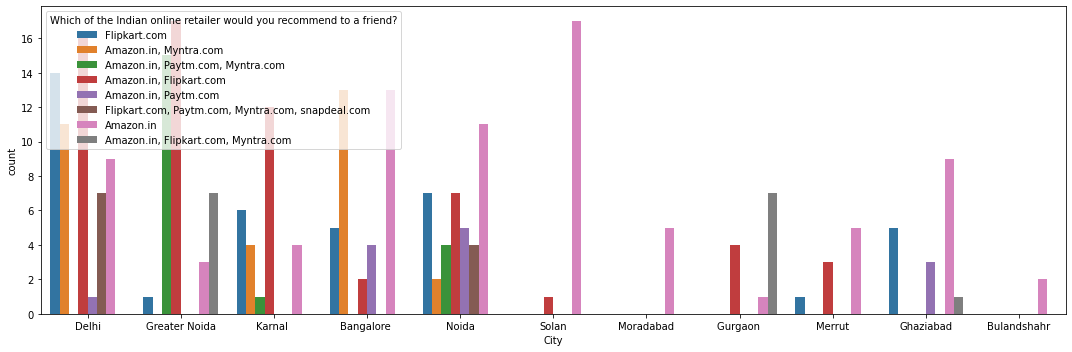

In [46]:
fig = plt.figure(figsize=(15,5))
sns.countplot('City', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

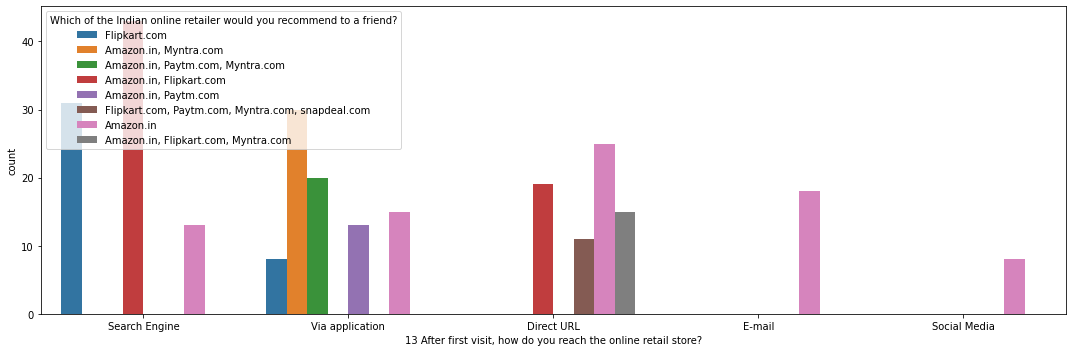

In [92]:
fig = plt.figure(figsize=(15,5))
sns.countplot('13 After first visit, how do you reach the online retail store?', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

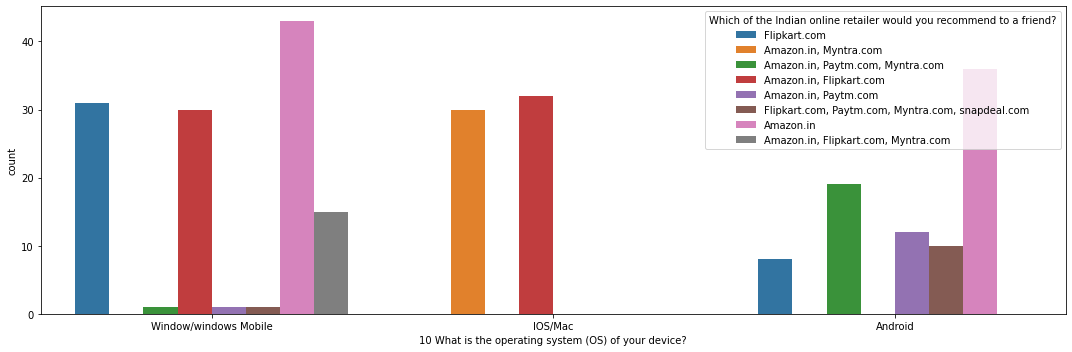

In [93]:
fig = plt.figure(figsize=(15,5))
sns.countplot('10 What is the operating system (OS) of your device?', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

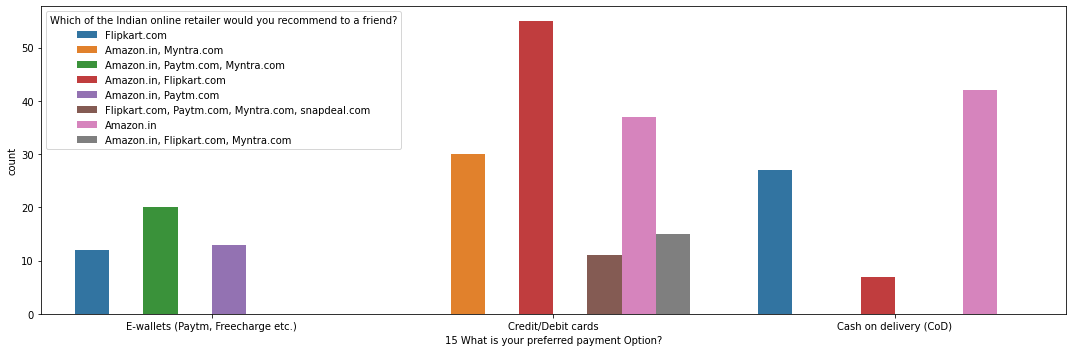

In [94]:
fig = plt.figure(figsize=(15,5))
sns.countplot('15 What is your preferred payment Option?', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

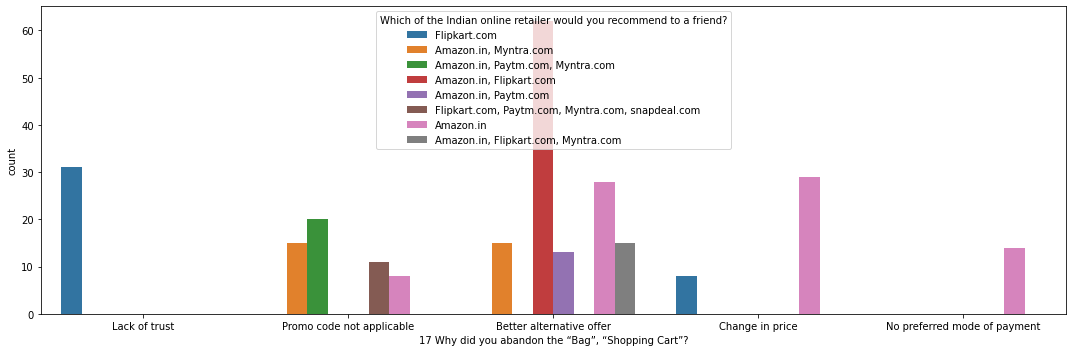

In [95]:
fig = plt.figure(figsize=(15,5))
sns.countplot('17 Why did you abandon the “Bag”, “Shopping Cart”?', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

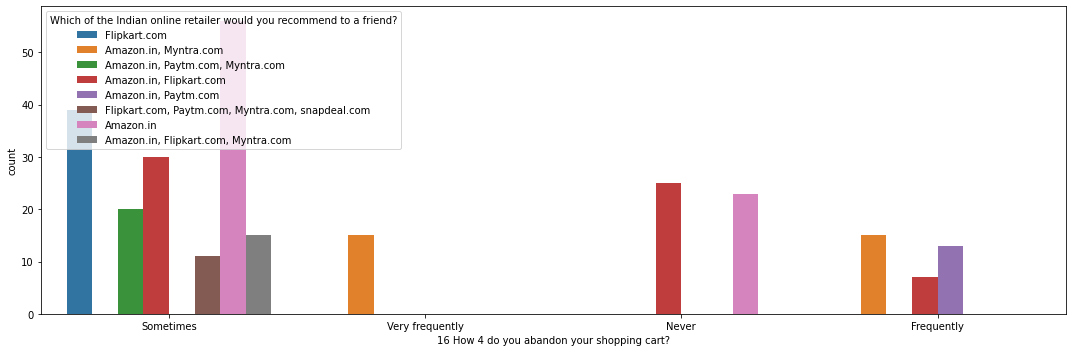

In [96]:
fig = plt.figure(figsize=(15,5))
sns.countplot('16 How 4 do you abandon your shopping cart?', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

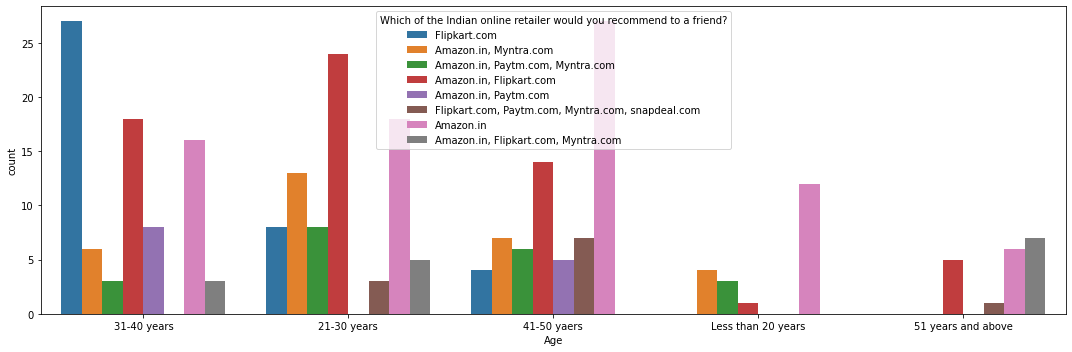

In [57]:
fig = plt.figure(figsize=(15,5))
sns.countplot('Age', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

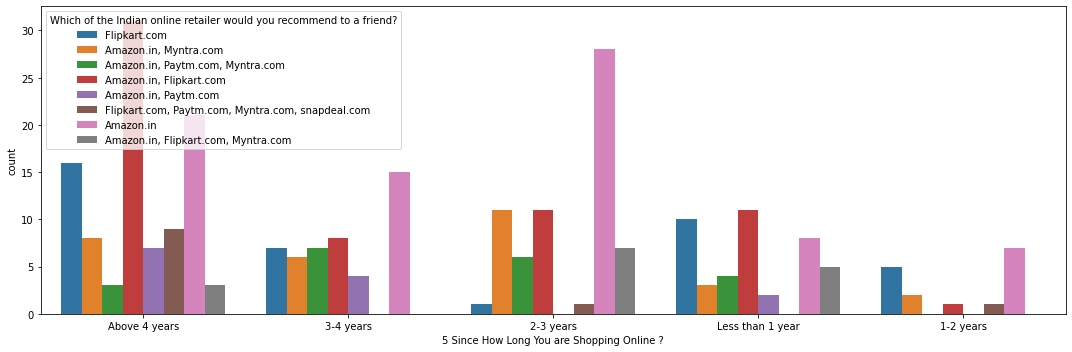

In [97]:
fig = plt.figure(figsize=(15,5))
sns.countplot('5 Since How Long You are Shopping Online ?', hue='Which of the Indian online retailer would you recommend to a friend?', data=df)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Online Shopping')

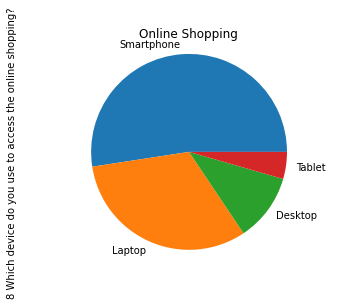

In [61]:
df["8 Which device do you use to access the online shopping?"].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Online Shopping')

Text(0.5, 1.0, 'Online Shopping')

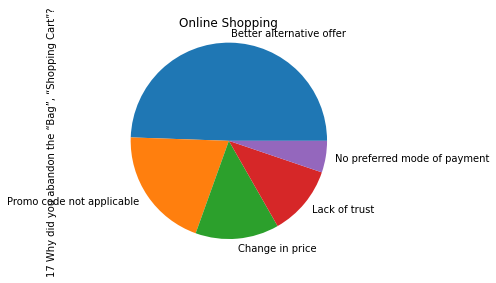

In [64]:
df["17 Why did you abandon the “Bag”, “Shopping Cart”?"].value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Online Shopping')

# Conclusion

In the dataset - We have a 2 set like general survey and custom survey. Based on the analysis in the dataset I have come for the conclusion and listed below. ALso, I have consider this as sample data because this data survey contain specific north zone of india.

These are the observation from my end:

1) Survey taken from the 11 cities in India for 5 e-commerce company.
2) Female customers are occupied 2/3 of survey and playing a major role in the Market.
3) Young peoples are mostly using the e commerce in the age of between 25 to 45.
4) E-commerce need a more trust in the people mindset, So that is important but Flipkart had a lack of trust.
5) E-Commerce accessabilty is more important. Amazon and Mytra have a more accessiblity in all site like Ios.
6) Product availability with full description and easy payment option which have more details.

Based on the comparison in the data. Most of the person will refer to the friend which is Amazon. Here, Amazon alone have 35% market occupency and have 25% along with other E-commerce company. Second position is flipkart have 30% share.

Major Reason behind for Amazon first position which is listed below:

* Easy Navigation
* Multiple offer with product
* Multiple payment option
* Easy accessablity.
* Customer Trust
* Product Quality
* Discount on product.

